In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path=r'C:\Users\anilg\Ds naresh it\EDA\Visadataset - Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Steps in outlier analysis**

- step-1: Find the Q1 , Q2 and Q3

     - np.percentile(column data,q)
    
- step-2: Calculate the IQR
    
    - IQR= Q3-Q1
    
- step-3: calculate lower boundary and upper boundary
    
    - lb: Q1-1.5IQR
        
    - ub: Q3+1.5IQR
        
- step-4: Find the outliersdf
    
    - c1: column data<lb
        
    - c2: column data>ub
        
    - main data[c]

In [4]:
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q1

34015.479999999996

In [5]:
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q2

70308.20999999999

In [6]:
Q3=np.percentile(visa_df["prevailing_wage"],75)

In [7]:
IQR=Q3-Q1
IQR

73720.03250000002

In [8]:
lb=Q1-(1.5*IQR)
lb

-76564.56875000002

In [9]:
ub=Q3+(1.5*IQR)
ub

218315.56125000003

In [10]:
c1=visa_df['prevailing_wage']<lb
visa_df[c1]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


In [11]:
len(visa_df[c1])

0

In [12]:
c2=visa_df['prevailing_wage']>ub
visa_df[c2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [13]:
c=c1|c2
out_liers=visa_df[c]

In [14]:
visa_df[c]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [15]:

c1=visa_df['prevailing_wage']>lb
c2=visa_df['prevailing_wage']<ub
c=c1&c2

non_outliers=visa_df[c]
non_outliers

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**compaire original data with non outliers data**

- will plot histogram and box plot of the both

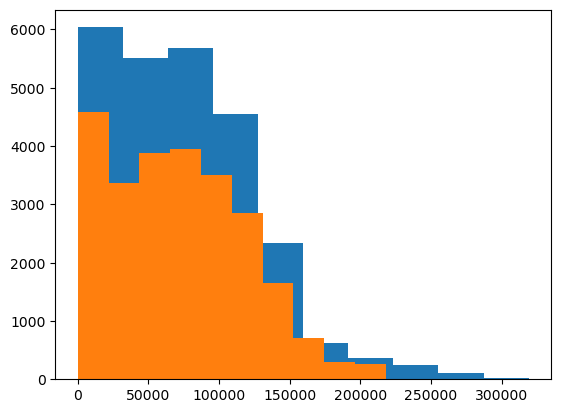

In [16]:
plt.hist(visa_df["prevailing_wage"])
plt.hist(non_outliers['prevailing_wage'])
plt.show()

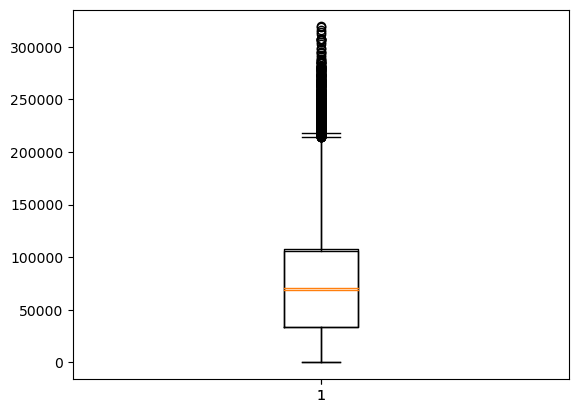

In [17]:
plt.boxplot(visa_df["prevailing_wage"])
plt.boxplot(non_outliers['prevailing_wage'])
plt.show()

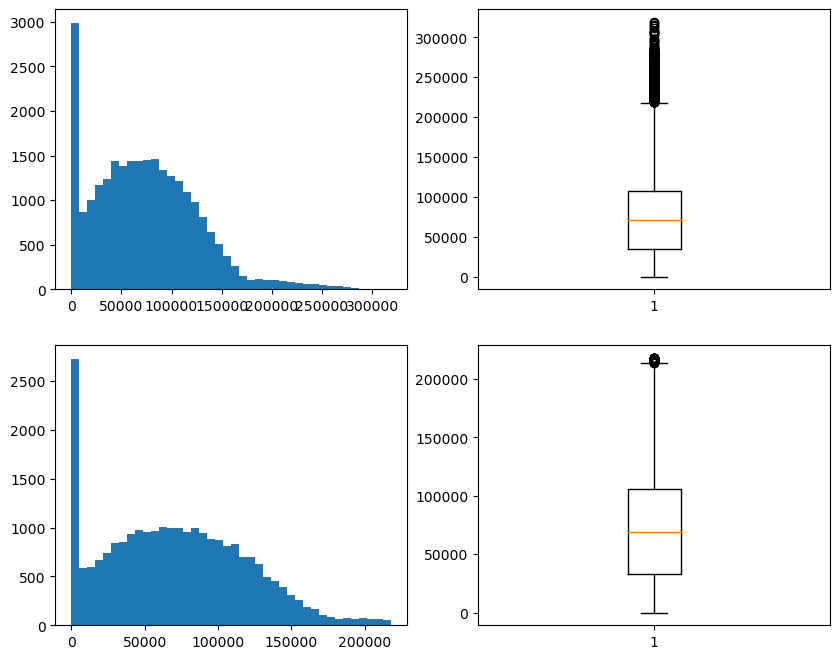

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2)
plt.boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3)
plt.hist(non_outliers["prevailing_wage"],bins=40)
plt.subplot(2,2,4)
plt.boxplot(non_outliers["prevailing_wage"])
plt.show()

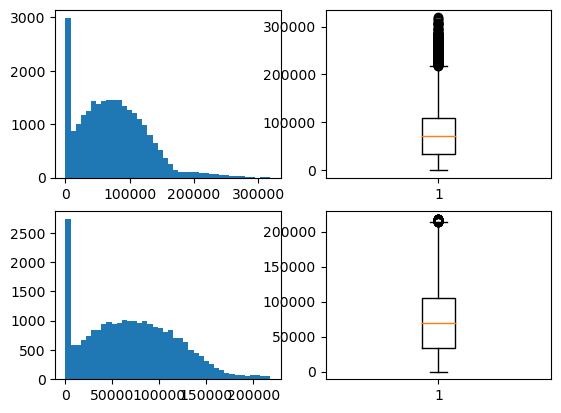

In [19]:
plt.subplot(2,2,1).hist(visa_df["prevailing_wage"],bins=40)
plt.subplot(2,2,2).boxplot(visa_df["prevailing_wage"])
plt.subplot(2,2,3).hist(non_outliers["prevailing_wage"],bins=40)
plt.subplot(2,2,4).boxplot(non_outliers["prevailing_wage"])
plt.show()

## how to deal outliers

**Drop the outliers**

     - we can drop the outlier percentage < 2%
    
     -  But this is not recomended , we lost other columns data also
        
**Impute with Median values**

     - As we know that Median does not affect by outliers
    
     - so it is good practice we can impute outliers with meadian value
        
**cap with Q3 or Q1 value**

    - if outliers are present less than lower bound then fill with Q1
    
    - if outliers are more than upper bound then fill with Q3

In [20]:
# task-3

# read the eacn observation from the prevailing wage
# if that observation ,lb or <ub : fill with median value
# else: keep as it is

# take empty list =[]
# median= visa_df['pwage'].median()
# for i in visa_df['pwage']:
#   if i<lb or i>ub:
#   emptylist.append(median)
# else:
#  emptylist.append(i)

# 25480

In [31]:
empty_list=[]
median=np.median(visa_df['prevailing_wage'])
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        empty_list.append(median)
    else:
        empty_list.append(i)
visa_df['prevailing_wage_new']=empty_list
len(empty_list)

25480

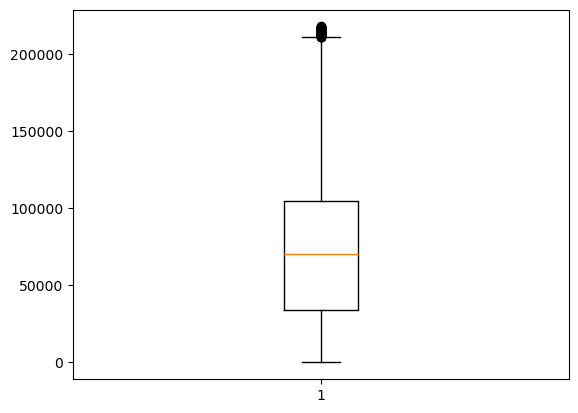

In [22]:
plt.boxplot(visa_df['prevailing_wage_new'])
plt.show()

$np.where$

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
path=r'C:\Users\anilg\Ds naresh it\EDA\Visadataset - Visadataset.csv'
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


- above replace one we use a traditional approach

- for loop,list,if-else

- the same we can get by using np.where method

In [25]:
dict1={"name":["A","B","c","D"],
      "Num":[1,2,3,4]}
pd.DataFrame(dict1)

,name,Num
0,A,1
1,B,2
2,c,3
3,D,4


In [26]:
# i want to get replace with 100 num which has > 2
# other wise keep same number

l=[]
for i in dict1['Num']:
    if i>2:
        l.append(100)
    else:
        l.append(i)
l



[1, 2, 100, 100]

In [27]:
# np.where(con,True,False)
# con=dict1['Num']>2
# True=100
# False=dict1['Num']

In [28]:
dict1={"name":["A","B","c","D"],
      "Num":[1,2,3,4]}
d=pd.DataFrame(dict1)

In [29]:
l=np.where(d['Num']>2,100,d['Num'])
d['Num']=l
d

,name,Num
0,A,1
1,B,2
2,c,100
3,D,100


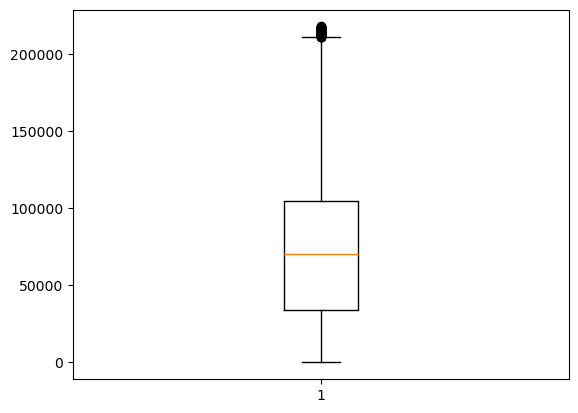

In [30]:
Q1=np.percentile(visa_df["prevailing_wage"],25)
Q2=np.percentile(visa_df["prevailing_wage"],50)
Q3=np.percentile(visa_df["prevailing_wage"],75)
IQR=Q3-Q1
lb=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
median=visa_df['prevailing_wage'].median()
c1=visa_df['prevailing_wage']<lb
c2=visa_df['prevailing_wage']>ub
con=c1|c2

t=median
f=visa_df['prevailing_wage']

visa_df['prevailing_wage']=np.where(con,t,f)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()
